# Code Business Analytics Assignment 3 - group ...

--------------------------------------------------

# Importing Data

In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
#Importing the data from .txt file
data = pd.read_csv('DataTrain.txt', sep=" ", header=None)
data.columns = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'NA', 'NA']
del data['NA']

# Creating and adding the RUL to the dataframe
RUL_list = []
for engine in set(data['engine_id']):
    max_cycle = data.loc[data['engine_id'] == engine].cycle.max()
    
    for cycle in list(data.loc[data['engine_id'] == engine].cycle):
        RUL_list.append(max_cycle - cycle +1)    
        
# data['RUL'] = RUL_list

data.insert(2, 'RUL', RUL_list)

data.head()
dataset = data
dataset.head()
# dcolumns.to_json ('Table.json', orient='records')

,engine_id,cycle,RUL,setting1,setting2,setting3,s1,s2,s3,s4,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,192,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,191,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,190,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,189,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,188,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [29]:
predict = pd.read_json('predict_data_short.json')

In [32]:
from sklearn.cluster import KMeans
feature_engineer(predict).head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,engine_id,cycle,s1,s10,s11,s12,s13,s14,s15,s16,...,delta_s8,max_s9,min_s9,delta_s9,max_setting1,min_setting1,delta_setting1,max_setting2,min_setting2,delta_setting2
0,1,1,518.67,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,...,0.00,9050.17,9050.17,0.00,0.0023,0.0023,0.0000,0.0003,0.0003,0.0000
1,2,1,518.67,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,...,-0.03,9054.42,9050.17,4.25,0.0023,-0.0027,-0.0050,0.0003,-0.0003,-0.0006
2,3,1,518.67,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,...,0.04,9056.96,9050.17,2.54,0.0023,-0.0027,0.0030,0.0003,-0.0003,0.0004
3,4,1,518.67,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,...,-0.02,9056.96,9045.29,-11.67,0.0042,-0.0027,0.0039,0.0003,-0.0003,-0.0001
4,5,1,518.67,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,...,-0.02,9056.96,9044.55,-0.74,0.0042,-0.0027,-0.0028,0.0003,-0.0003,0.0000


In [23]:
def feature_engineer(dataset):
    X = dataset[dataset.columns[2:]]
    engine = dataset.iloc[:,0].to_list()
    cycle = dataset.iloc[:,1].to_list()

    # Clustering the data
    X_cluster = X[['setting1', 'setting2', 'setting3']]

    # creates the clusters
    kmeans = KMeans(n_clusters=3).fit(X_cluster)
    X['settings_clusters'] = kmeans.predict(X_cluster)

    features = dataset.columns[2:-1]
    for feature in features:
        # Creating min, max and delta variables
        X['max_' + feature] = dataset.groupby('engine_id')[feature].cummax()
        X['min_' + feature] = dataset.groupby('engine_id')[feature].cummin()

        X['delta_' + feature] = dataset.groupby('engine_id')[feature].diff()
        X['delta_' + feature].fillna(0, inplace=True)

    X.insert(0, 'engine_id', engine)
    X.insert(1, 'cycle', cycle)
    return X

In [3]:
columns = dataset.columns
columns = columns[3:].to_list()
columns

['setting1',
 'setting2',
 'setting3',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6',
 's7',
 's8',
 's9',
 's10',
 's11',
 's12',
 's13',
 's14',
 's15',
 's16',
 's17',
 's18',
 's19',
 's20',
 's21']

In [4]:
# X = dataset.loc[[columns]]
# Y = dataset.loc[['RUL']]

X = dataset[dataset.columns[3:]]
Y = dataset[dataset.columns[2]]

In [6]:
from sklearn import ensemble

params = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.25}
    
model = ensemble.GradientBoostingRegressor(**params)
model.fit(X, Y)

GradientBoostingRegressor(learning_rate=0.25, max_depth=5, n_estimators=400)

In [13]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [14]:
model2 = pickle.load(open('model.pkl', 'rb'))

In [17]:
model2.score

<bound method RegressorMixin.score of GradientBoostingRegressor(learning_rate=0.25, max_depth=5, n_estimators=400)>

# Prediction Task

## Check correlations within data

In [3]:
def create_correlation_matrix(data):
    correlation_matrix = data.corr(method = 'pearson')
    correlation_matrix = correlation_matrix.replace(1, 0)
    best_corr = correlation_matrix.max()
    print('Best overall corralation: ', best_corr)
    best_corr_RUL = correlation_matrix['RUL'].max()
    print('Best RUL correlation:', best_corr_RUL)
    return correlation_matrix

In [99]:
#Calculating correlations
print(create_correlation_matrix(data))

Best overall corralation:  engine_id    7.875253e-02
cycle        6.343845e-01
RUL          6.719831e-01
setting1     1.166044e-02
setting2     1.815635e-02
setting3              NaN
s1           6.935511e-09
s2           7.400200e-01
s3           6.959002e-01
s4           8.301357e-01
s5           6.935500e-09
s6           1.600145e-01
s7           8.127126e-01
s8           8.260843e-01
s9           9.631566e-01
s10          6.935505e-09
s11          8.301357e-01
s12          8.127126e-01
s13          8.260843e-01
s14          9.631566e-01
s15          7.809128e-01
s16          6.935514e-09
s17          7.222963e-01
s18                   NaN
s19                   NaN
s20          7.519431e-01
s21          7.562626e-01
dtype: float64
Best RUL correlation: 0.6719831036132967
              engine_id         cycle           RUL      setting1  \
engine_id  0.000000e+00  7.875253e-02  7.875253e-02 -1.789509e-02   
cycle      7.875253e-02  0.000000e+00 -7.362406e-01 -4.526813e-03   
RUL     

## Creating Features 

In [4]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
def features_per_engine(nclusters, clustering = True, MinMax = True, Delta = True, elbow = True):
    if clustering:
        X = data[['setting1', 'setting2', 'setting3']]

        #plots the elbow plot to determine right amount of clusters
        if elbow:
            wcss = []
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
                kmeans.fit(X)
                wcss.append(kmeans.inertia_)
            plt.plot(range(1, 11), wcss)
            plt.title('Elbow Method')
            plt.xlabel('Number of clusters')
            plt.ylabel('WCSS')
            plt.show()

        #creates the clusters
        kmeans = KMeans(n_clusters=nclusters).fit(X)
        data['settings_clusters'] = kmeans.predict(X)
    
    if clustering:
        features = data.columns[3:-1]
    else:
        features = data.columns[3:]
            
    for feature in features:
        if MinMax:
            #adding min and max for every feature per engine_id       
            data['max_' + feature] = data.groupby('engine_id')[feature].cummax()
            data['min_' + feature] = data.groupby('engine_id')[feature].cummin()

        if Delta:
            #creating delta for every feature per engine_id
            data['delta_' + feature] = data.groupby('engine_id')[feature].diff()
            data['delta_' + feature].fillna(0, inplace=True)
    
    return kmeans

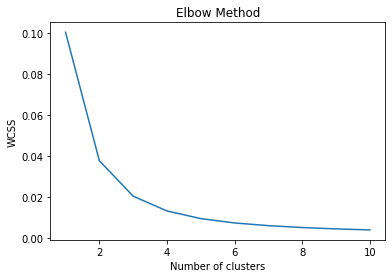

In [6]:
clusterkmeans = features_per_engine(3)

In [7]:
print(*data.columns, sep=', ')

engine_id, cycle, RUL, setting1, setting2, setting3, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, settings_clusters, max_setting1, min_setting1, delta_setting1, max_setting2, min_setting2, delta_setting2, max_setting3, min_setting3, delta_setting3, max_s1, min_s1, delta_s1, max_s2, min_s2, delta_s2, max_s3, min_s3, delta_s3, max_s4, min_s4, delta_s4, max_s5, min_s5, delta_s5, max_s6, min_s6, delta_s6, max_s7, min_s7, delta_s7, max_s8, min_s8, delta_s8, max_s9, min_s9, delta_s9, max_s10, min_s10, delta_s10, max_s11, min_s11, delta_s11, max_s12, min_s12, delta_s12, max_s13, min_s13, delta_s13, max_s14, min_s14, delta_s14, max_s15, min_s15, delta_s15, max_s16, min_s16, delta_s16, max_s17, min_s17, delta_s17, max_s18, min_s18, delta_s18, max_s19, min_s19, delta_s19, max_s20, min_s20, delta_s20, max_s21, min_s21, delta_s21


In [ ]:
data = pd.read_csv('Data_predict_short.txt', sep=" ", header=None)
data.columns = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'NA', 'NA']
del data['NA']

# Creating and adding the RUL to the dataframe
RUL_list = []
for engine in set(data['engine_id']):
    max_cycle = data.loc[data['engine_id'] == engine].cycle.max()
    
    for cycle in list(data.loc[data['engine_id'] == engine].cycle):
        RUL_list.append(max_cycle - cycle +1)    
        
# data['RUL'] = RUL_list

data.insert(2, 'RUL', RUL_list)

## Train Test Split

In [8]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn import metrics

In [9]:
# Making train test split
labels = data['RUL']
features = data.iloc[:,3:]
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [10]:
def train_test_split_custom(data, labels, features, test_split):
    seed(1)
    X_train = data.iloc[0:0]
    X_val = data.iloc[0:0]
    y_train = data.iloc[0:0]
    y_val = data.iloc[0:0]
    train_list = data.iloc[0:0]
    test_list = data.iloc[0:0]
    sequence = [i for i in range(1, 101, 1)]
    test = sample(sequence, test_split)
    train = [x for x in sequence if x not in test]
    for index, row in data.iterrows():
        if row['engine_id'] in train:
            train_list = train_list.append(row)
    for index, row in data.iterrows():
        if row['engine_id'] in test:
            test_list = test_list.append(row)
    X_train = train_list.iloc[:,3:]
    X_val = test_list.iloc[:,3:]
    y_train = train_list['RUL']
    y_val = test_list['RUL']

    return X_train, X_val, y_train, y_val

In [ ]:
#When this code is ran, the train-test split is made with only complete engine cycles
# labels = data['RUL']
# features = data.iloc[:,3:]
#X_train, X_val, y_train, y_val = train_test_split_custom(data, labels, features, test_split = 30)

## PCA

<font color='red'> The PCA was not used in the best performing model, so do not run this code! </font>

In [109]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

In [94]:
def pca_features(X_train, X_val):
    X_scaler = StandardScaler()
    X_scaler.fit(X_train)
    X_train_img = X_scaler.transform(X_train)
    X_val_img = X_scaler.transform(X_val)
    pca = PCA(.95)
    pca.fit(X_train_img)
    X_train = pca.transform(X_train_img)
    X_val = pca.transform(X_val_img)
    return X_train, X_val

In [95]:
# X_train, X_val = pca_features(X_train, X_val)

## Parameter Tuning

In [28]:
#Functions for training four different machine learning models
def random_forest_reg(X_train, y_train, X_val, y_val):
    params = {'n_estimators': 100, 'max_depth':10}
    
    rf = ensemble.RandomForestRegressor(**params)
    rf.fit(X_train, y_train)
    
    print_evaluation_metrics(rf, "Random forest", X_val, y_val.values.ravel())
    print_evaluation_metrics2(rf, "Random forest", X_train, y_train.values.ravel())
    
    return rf

def gradient_boosting_reg(X_train, y_train, X_val, y_val):
    params = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.25}
    
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    
    print_evaluation_metrics(clf, "Gradient Boosting Regressor", X_val, y_val.values.ravel())
    print_evaluation_metrics2(clf, "Gradient Boosting Regressor", X_train, y_train.values.ravel())
    
    return clf
 
def svm(X_train, y_train, X_val, y_val):
    params = {'gamma':'scale', 'kernel':'rbf'}
    
    model = SVR(**params) 
    model.fit(X_train, y_train)
    
    print_evaluation_metrics(model, "SVM", X_val, y_val.values.ravel())
    print_evaluation_metrics2(model, "SVM", X_train, y_train.values.ravel())
    
    return model
    

def adaBoost(X_train, y_train, X_val, y_val):
    params = {'random_state':24, 'n_estimators':100}
    
    regr = ensemble.AdaBoostRegressor(**params)
    regr.fit(X_train, y_train)
    
    print_evaluation_metrics(regr, "Ada Boost", X_val, y_val.values.ravel())
    print_evaluation_metrics2(regr, "Ada Boost", X_train, y_train.values.ravel())
    
    return regr

In [12]:
#These functions are used for printing and evaluating performance

def print_evaluation_metrics(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' ---------\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(y_test, predicted_values))
    print("Median absolute error: ",
          metrics.median_absolute_error(y_test, predicted_values))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))
    print("---------------------------------------")


def print_evaluation_metrics2(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' --------- (Train Data)\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(y_test, predicted_values))
    print("Median absolute error: ",
          metrics.median_absolute_error(y_test, predicted_values))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))
    print("---------------------------------------")

In [13]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc

In [33]:
#Function to perform parameter tuning for the two best algorithms : Gradient Boosting Regressor and Random Forest
def parameter_tuning(X_train, y_train, X_val, y_val, algorithm = 'gbr', lr = True, N_est = True, depth = True):
    if algorithm == 'gbr':
        if lr:
            #learning rate
            learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
            train_results = []
            test_results = []
            for eta in learning_rates:
                model = ensemble.GradientBoostingRegressor(learning_rate=eta)
                model.fit(X_train, y_train)
                train_pred = model.predict(X_train)
                MAE = metrics.mean_squared_error(y_train, train_pred)
                train_results.append(MAE)

                y_pred = model.predict(X_val)
                MAE = metrics.mean_squared_error(y_val, y_pred)
                test_results.append(MAE)

            line1, = plt.plot(learning_rates, train_results, 'b', label='Train MSE')
            line2, = plt.plot(learning_rates, test_results, 'r', label='Test MSE')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel('MSE')
            plt.xlabel('learning rate')
            plt.title('GBR learning_rate tuning')
            plt.show()
        
        if N_est:
            #N_estimators
            n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 600, 800]
            train_results = []
            test_results = []
            for eta in n_estimators:
                model = ensemble.GradientBoostingRegressor(n_estimators=eta)
                model.fit(X_train, y_train)
                train_pred = model.predict(X_train)
                MAE = metrics.mean_squared_error(y_train, train_pred)
                train_results.append(MAE)

                y_pred = model.predict(X_val)
                MAE = metrics.mean_squared_error(y_val, y_pred)
                test_results.append(MAE)

            line1, = plt.plot(n_estimators, train_results, 'b', label='Train MSE')
            line2, = plt.plot(n_estimators, test_results, 'r', label='Test MSE')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel('MSE')
            plt.xlabel('n_estimators')
            plt.title('GBR n_estimators tuning')
            plt.show()
        
        if depth:
            #max_depth
            max_depths = np.linspace(1, 10, 10, endpoint=True)
            train_results = []
            test_results = []
            for eta in max_depths:
                model = ensemble.GradientBoostingRegressor(max_depth=eta)
                model.fit(X_train, y_train)
                train_pred = model.predict(X_train)
                MAE = metrics.mean_squared_error(y_train, train_pred)
                train_results.append(MAE)

                y_pred = model.predict(X_val)
                MAE = metrics.mean_squared_error(y_val, y_pred)
                test_results.append(MAE)

            line1, = plt.plot(max_depths, train_results, 'b', label='Train MSE')
            line2, = plt.plot(max_depths, test_results, 'r', label='Test MSE')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel('MSE')
            plt.xlabel('max_depth')
            plt.title('GBR max_depth tuning')
            plt.show()
    
    if algorithm == 'rf':
        if N_est:
            #N_estimators
            n_estimators = [1, 2, 4, 8, 16, 32, 64, 128]
            train_results = []
            test_results = []
            for eta in n_estimators:
                model = ensemble.RandomForestRegressor(n_estimators=eta)
                model.fit(X_train, y_train)
                train_pred = model.predict(X_train)
                MAE = metrics.mean_absolute_error(y_train, train_pred)
                train_results.append(MAE)

                y_pred = model.predict(X_val)
                MAE = metrics.mean_absolute_error(y_val, y_pred)
                test_results.append(MAE)

            line1, = plt.plot(n_estimators, train_results, 'b', label='Train MAE')
            line2, = plt.plot(n_estimators, test_results, 'r', label='Test MAE')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel('MAE')
            plt.xlabel('n_estimators')
            plt.title('RF n_estimators tuning')
            plt.show()
        
        if depth:
            #max_depth
            max_depths = np.linspace(1, 15, 15, endpoint=True)
            train_results = []
            test_results = []
            for eta in max_depths:
                model = ensemble.RandomForestRegressor(max_depth=eta)
                model.fit(X_train, y_train)
                train_pred = model.predict(X_train)
                MAE = metrics.mean_absolute_error(y_train, train_pred)
                train_results.append(MAE)

                y_pred = model.predict(X_val)
                MAE = metrics.mean_absolute_error(y_val, y_pred)
                test_results.append(MAE)

            line1, = plt.plot(max_depths, train_results, 'b', label='Train MAE')
            line2, = plt.plot(max_depths, test_results, 'r', label='Test MAE')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel('MAE')
            plt.xlabel('max_depth')
            plt.title('RF max_depth tuning')
            plt.show()

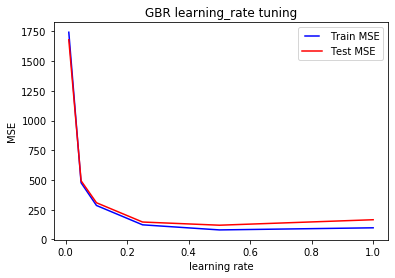

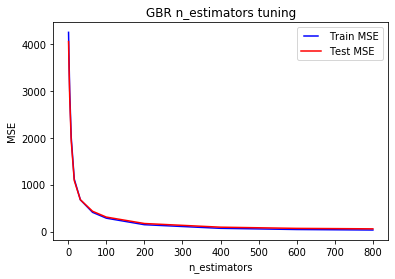

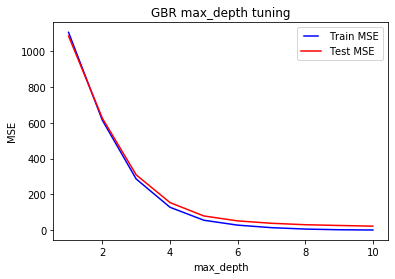

In [34]:
parameter_tuning(X_train, y_train, X_val, y_val)

## Training model

In [29]:
#Running models
print("------ Running random forest regressor ------")
random_forest_reg(X_train, y_train, X_val, y_val)

------ Running random forest regressor ------
--------- For Model:  Random forest  ---------

Mean absolute error:  5.5276867231990385
Median absolute error:  3.682578434753637
Mean squared error:  72.92306090010798
R2:  0.9840792370595227
---------------------------------------
--------- For Model:  Random forest  --------- (Train Data)

Mean absolute error:  4.743058713827503
Median absolute error:  3.0267350718853265
Mean squared error:  53.495840702031614
R2:  0.9888874506747073
---------------------------------------


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
print("--- Running Gradient Boosting Regressor ---")
gbr = gradient_boosting_reg(X_train, y_train, X_val, y_val)

--- Running Gradient Boosting Regressor ---
--------- For Model:  Gradient Boosting Regressor  ---------

Mean absolute error:  4.442303813863159
Median absolute error:  3.161749110373364
Mean squared error:  43.403927579855555
R2:  0.990523935320939
---------------------------------------
--------- For Model:  Gradient Boosting Regressor  --------- (Train Data)

Mean absolute error:  1.621833879184174
Median absolute error:  1.2981780044873261
Mean squared error:  4.450438648250651
R2:  0.9990755221649223
---------------------------------------


In [17]:
print("---------------- Running SVR ----------------")
svm(X_train, y_train, X_val, y_val)

---------------- Running SVR ----------------
--------- For Model:  SVM  ---------

Mean absolute error:  55.85141894065355
Median absolute error:  50.88194576799877
Mean squared error:  4637.509216532815
R2:  -0.01247374917292321
---------------------------------------
--------- For Model:  SVM  --------- (Train Data)

Mean absolute error:  57.09853314659068
Median absolute error:  52.86244002233168
Mean squared error:  4850.411145486816
R2:  -0.00756306275086871
---------------------------------------


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
print("--- Running ADABoost Regressor ---")
adaBoost(X_train, y_train, X_val, y_val)

--- Running ADABoost Regressor ---
--------- For Model:  Ada Boost  ---------

Mean absolute error:  29.09569560515158
Median absolute error:  29.44341859505841
Mean squared error:  1119.5932531065869
R2:  0.7555673259946578
---------------------------------------
--------- For Model:  Ada Boost  --------- (Train Data)

Mean absolute error:  29.029205057935062
Median absolute error:  29.862935928629355
Mean squared error:  1115.564050847274
R2:  0.7682668338719493
---------------------------------------


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=24)

## Predicting RUL

In [28]:
# Code to convert python notebook to regular python file.
# !jupyter nbconvert --to python Assignment_3.ipynb

In [16]:
dataSchedule = pd.read_csv('DataSchedule.txt', sep=" ", header=None)
dataSchedule.columns = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'NA', 'NA']
del dataSchedule['NA']


dataSchedule.to_json ('predict_data.json', orient='records')
# dataSchedule.loc[dataSchedule['engine_id'] == 1]

In [20]:
def features_prediction(kmeans, MinMax = True, Delta = True):
    #Clustering
    X = dataSchedule[['setting1', 'setting2', 'setting3']]    
    dataSchedule['settings_clusters'] = kmeans.predict(X)
    
    #Creating min max and delta
    features = dataSchedule.columns[2:-1]
    for feature in features:
        if MinMax:
            #adding min and max for every feature per engine_id
            dataSchedule['max_' + feature] = data.groupby('engine_id')[feature].cummax()
            dataSchedule['min_' + feature] = data.groupby('engine_id')[feature].cummin()
    
        if Delta: 
            #creating delta for every feature per engine_id
            dataSchedule['delta_' + feature] = dataSchedule.groupby('engine_id')[feature].diff()
            dataSchedule['delta_' + feature].fillna(0, inplace=True)    
    

In [21]:
#creates the additional features likewise to the train data. Also using the trained Kmeans clustering algorithm
features_prediction(clusterkmeans)

In [22]:
#predicts the RUL values
x_prediction = dataSchedule.iloc[:,2:]
RUL_prediction = gbr.predict(x_prediction).round().astype(int)

#Getting data in usable format
dataSchedule.insert(2, "RUL", RUL_prediction)
RUL_list = dataSchedule.groupby('engine_id').RUL.last()
# RUL_list.to_excel('RUL_list.xlsx')

----------------------

# Optimization Task 1

## Data collection

In [ ]:
from pulp import *

In [ ]:
data_RUL.loc[data_RUL['RUL'] < 25]

In [28]:
data_RUL = RUL_list.to_frame()
data_RUL_consultancy = pd.read_csv('Data/RUL_consultancy_predictions_A3.csv', sep=';')
# data_RUL2 = pd.read_excel('RUL_list.xlsx')

In [ ]:
penalty_cost = [5]*20+[7]*20+[9]*20+[5]*20+[3]*20
mu_a = [4]*25+[6]*25+[3]*25+[5]*25
mu_b = [5]*25+[7]*8+[8]*17+[5]*17+[4]*8+[6]*25

Ga = [1,2]
Gb = [3,4]
G = Ga + Gb

# data_RUL['RUL'] = [0 if value < 0 else value for value in data_RUL['RUL'] ]
engines = list(set(data_RUL['engine_id']))

R_Consultancy = list(data_RUL_consultancy['RUL'])
R_Prediction = list(data_RUL['RUL'])

dict_mu_a = {index+1 : value for index, value in enumerate(mu_a)}
dict_mu_b = {index+1 : value for index, value in enumerate(mu_b)}

penalty_cost = {index+1 : value for index, value in enumerate(penalty_cost)}

mu_dict = {}
for i in G:
    if i in Ga:
        mu_dict[i] = dict_mu_a
    else:
        mu_dict[i] = dict_mu_b

## Part A: Total Model

In [ ]:
def model(planning_horizon, R):
    D = LpVariable.dicts('Team_i_STARTS_to_work_on_engine_j_day_t', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')

    X = LpVariable.dicts('Opposite of D', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')
    
    model = LpProblem('RUL_prediction', LpMinimize)
    
    # objective function
    model += lpSum(penalty_cost[j]*D[(i,j,t)]*max(((t+mu_dict[i][j] -1) -R[j-1]), 0) for j in engines for i in G for t in range(1, planning_horizon+1)) + lpSum(max(0,planning_horizon-R[j-1])*penalty_cost[j]*(lpSum(X[(i,j,t)] for i in G for t in range(1, planning_horizon+1)) - (len(G) * planning_horizon - 1)) for j in engines) 
    
    #constraints
    for i in G:
        for day in range(1, planning_horizon + 1):
            for j in engines:
                model += lpSum(D[(i,j,t)] for t in range(day, min(day + mu_dict[i][j] - 1, planning_horizon) + 1) for j in engines ) <= 1

    for j in engines:
        model += lpSum(D[(i,j,t)] for t in range(1, planning_horizon+1) for i in G) <= 1

    for i in G:
        model += lpSum(D[(i,j,t)] for t in range(max(planning_horizon-mu_dict[i][j] + 2, 0), planning_horizon+1) for j in engines) == 0

    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                model += D[(i,j,t)] + X[(i,j,t)] == 1
                
    model.solve()
    print('Status:', LpStatus[model.status])
    teama = ['Schedule of teams of type a:']
    teamb = ['Schedule of teams of type b:']
    costs = ['Penalty costs of engines which are repaired:']
    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                if D[(i,j,t)].varValue > 0:
                    costs_per_engine = penalty_cost[j]*D[(i,j,t)].varValue*max(((t+mu_dict[i][j] -1) -R[j-1]), 0)
                    if costs_per_engine > 0:
                        costs.append('The penalty costs of engine {} are {}'.format(j,costs_per_engine))
                if D[(i,j,t)].varValue > 0:
                    if i in Ga:
                        teama.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_a[j-1]-1))
                    if i in Gb:
                        teamb.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_b[j-1]-1))
    print('The lowest schedule cost is', value(model.objective))
                
    return 'The total penalty costs are {}'.format(value(model.objective)), teama, teamb, costs

## Part B

In [ ]:
model(20, R_Prediction)

## Part C

In [ ]:
model(20, R_Consultancy)

---------------------------

# Optimization Task 2
## Part B

In [ ]:
#add variable
dic_h = {i:2 for i in range(1,101)}
K = {1:dic_h, 2:dic_h,3:dic_h,4:dic_h}
planning_horizon = 20   

In [ ]:
def model_2(planning_horizon, R):
    D = LpVariable.dicts('Team_i_STARTS_to_work_on_engine_j_day_t', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')

    X = LpVariable.dicts('Opposite of D', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')
    
    model = LpProblem('RUL_prediction', LpMinimize)
    
    # objective function
    model += lpSum(penalty_cost[j]*D[(i,j,t)]*max(((t+mu_dict[i][j] -1) -R[j-1]), 0) for j in engines for i in G for t in range(1, planning_horizon+1)) + lpSum(max(0,planning_horizon-R[j-1])*penalty_cost[j]*(lpSum(X[(i,j,t)] for i in G for t in range(1, planning_horizon+1)) - len(G) * planning_horizon + 1) for j in engines) 
    
    #constraints
    for i in G:
        for day in range(1, planning_horizon + 1):
            for j in engines:
                model += lpSum(D[(i,j,t)] for t in range(day, min(day + mu_dict[i][j] - 1, planning_horizon) + 1) for j in engines ) <= 1

    for j in engines:
        model += lpSum(D[(i,j,t)] for t in range(1, planning_horizon+1) for i in G) <= 1

    for i in G:
        model += lpSum(D[(i,j,t)] for t in range(max(planning_horizon-mu_dict[i][j] + 2, 0), planning_horizon+1) for j in engines) == 0

    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                model += D[(i,j,t)] + X[(i,j,t)] == 1
    
    #add constraint
    for i in G:
        model += lpSum(D[(i,j,t)] for j in engines for t in range(1, planning_horizon+1)) <= K[i][planning_horizon]
        
    model.solve()
    print('Status:', LpStatus[model.status])
    teama = ['Schedule of teams of type a:']
    teamb = ['Schedule of teams of type b:']
    costs = ['Penalty costs of engines which are repaired:']
    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                if D[(i,j,t)].varValue > 0:
                    costs_per_engine = penalty_cost[j]*D[(i,j,t)].varValue*max(((t+mu_dict[i][j] -1) -R[j-1]), 0)
                    if costs_per_engine > 0:
                        costs.append('The penalty costs of engine {} are {}'.format(j,costs_per_engine))
                if D[(i,j,t)].varValue > 0:
                    if i in Ga:
                        teama.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_a[j-1]-1))
                    if i in Gb:
                        teamb.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_b[j-1]-1))
    print('The lowest schedule cost is', value(model.objective))
                
    return 'The total penalty costs are {}'.format(value(model.objective)), teama, teamb, costs

In [ ]:
model_2(20, R_Prediction)

## Part C

In [ ]:
model_2(20, R_Consultancy)

## Part D

In [ ]:
model_2(25, R_Consultancy)

---------------------------

# Optimization Task 3
## Part B

In [ ]:
L = 33*[1] + 67*[2]
Gm = {1:1,2:2,3:1,4:2}

In [ ]:
def model_3(planning_horizon, R):
    D = LpVariable.dicts('Team_i_STARTS_to_work_on_engine_j_day_t', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')

    X = LpVariable.dicts('Opposite of D', 
                    [(i,j,t) for j in engines for i in G for t in range(1, planning_horizon + 1)]
                    , lowBound = 0, upBound = 1, cat='Integer')
    
    model = LpProblem('RUL_prediction', LpMinimize)
    
    # objective function
    model += lpSum(penalty_cost[j]*D[(i,j,t)]*max(((t+mu_dict[i][j] -1) -R[j-1]), 0) for j in engines for i in G for t in range(1, planning_horizon+1)) + lpSum(max(0,planning_horizon-R[j-1])*penalty_cost[j]*(lpSum(X[(i,j,t)] for i in G for t in range(1, planning_horizon+1)) - len(G) * planning_horizon + 1) for j in engines) 
    
    #constraints
    for i in G:
        for day in range(1, planning_horizon + 1):
            for j in engines:
                model += lpSum(D[(i,j,t)] for t in range(day, min(day + mu_dict[i][j] - 1, planning_horizon) + 1) for j in engines ) <= 1  
    
    for j in engines:
        model += lpSum(D[(i,j,t)] for t in range(1, planning_horizon+1) for i in G) <= 1

    for i in G:
        model += lpSum(D[(i,j,t)] for t in range(max(planning_horizon-mu_dict[i][j] + 2, 0), planning_horizon+1) for j in engines) == 0

    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                model += D[(i,j,t)] + X[(i,j,t)] == 1
    
    #add constraint
    for i in G:
        model += lpSum(D[(i,j,t)] for j in engines for t in range(1, planning_horizon+1)) <= K[i][planning_horizon]
        
    #add regional constraint
    for j in engines:
            for i in G:
                for t in range(1, planning_horizon + 1):
                    model+= D[(i,j,t)]*L[j-1] == D[(i,j,t)]*Gm[i] 
        
    model.solve()
    print('Status:', LpStatus[model.status])
    teama = ['Schedule of teams of type a:']
    teamb = ['Schedule of teams of type b:']
    costs = ['Penalty costs of engines which are repaired:']
    for j in engines:
        for i in G:
            for t in range(1, planning_horizon + 1):
                if D[(i,j,t)].varValue > 0:
                    costs_per_engine = penalty_cost[j]*D[(i,j,t)].varValue*max(((t+mu_dict[i][j] -1) -R[j-1]), 0)
                    if costs_per_engine > 0:
                        costs.append('The penalty costs of engine {} are {}'.format(j,costs_per_engine))
                if D[(i,j,t)].varValue > 0:
                    if i in Ga:
                        teama.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_a[j-1]-1))
                    if i in Gb:
                        teamb.append('Team {} starts working on engine {} on t = {} until t = {}'.format(i,j,t, t+mu_b[j-1]-1))
    print('The lowest schedule cost is', value(model.objective))
                
    return 'The total penalty costs are {}'.format(value(model.objective)), teama, teamb, costs

In [ ]:
model_3(20, R_Prediction)

## Part C

In [ ]:
model_3(20, R_Consultancy)

## Part D

In [ ]:
model_3(25, R_Consultancy)

In [29]:
data_RUL

,RUL
engine_id,
1,160
2,107
3,240
4,157
5,73
6,146
7,164
8,9
9,213


In [35]:
data_RUL.insert(1, 'consult', data_RUL_consultancy['RUL'])

In [37]:
data_RUL

,RUL,consult
engine_id,,
1,160,125.0
2,107,63.0
3,240,100.0
4,157,103.0
5,73,122.0
6,146,106.0
7,164,90.0
8,9,121.0
9,213,67.0
